Q3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython import display
from matplotlib import animation
from scipy.integrate import odeint

m1 = 1
m2 = 1
L1 = 0.5
L2 = 0.5
g = 9.81

# 微分方程
def arm_ode(x,t):
    x1 = np.array([x[0],x[1]])
    x2 = np.array([x[2],x[3]])
    u = np.zeros((2,1)) # zero torque control
    M = np.mat([[
        m1 * L1**2 + m2 * (L1**2 + 2 * L1 * L2 * np.cos(x1[1]) + L2**2),
        m2 * (L1 * L2 * np.cos(x1[1]) + L2**2)
    ], [m2 * (L1 * L2 * np.cos(x1[1]) + L2**2), m2 * L2**2]])
    c = np.array(
        [[-1 * m2 * L1 * L2 * np.sin(x1[1]) * (2 * x2[0] * x2[1] + x2[1]**2)],
         [m2 * L1 * L2 * x2[0]**2 * np.sin(x1[1])]])
    gtheta = np.array([[(m1 + m2) * L1 * g * np.cos(x1[0]) +
                        m2 * g * L2 * np.cos(x1[0] + x1[1])],
                       [m2 * g * L2 * np.cos(x1[0] + x1[1])]])
    x1_dot = x2
    x2_dot = np.linalg.inv(M).dot(u - c - gtheta)
    return [x1_dot[0], x1_dot[1], x2_dot[0], x2_dot[1]]


t_length = 10  # 10 second of simulation
dt = 0.001
times = np.arange(0,t_length,dt)
x_init = [0, np.pi/2, 0, 0] # 输入量为theta1 theta2 theta1的线速度 theta2的线速度 


x_traj = odeint(arm_ode, x_init, times)
# plt.plot(times,x_traj[:,0])
# plt.plot(times,x_traj[:,1])


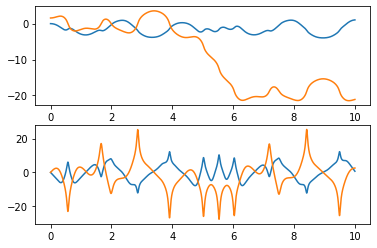

In [3]:
plt.subplot(211)
plt.plot(times,x_traj[:,0])
plt.plot(times,x_traj[:,1])
plt.subplot(212)
plt.plot(times,x_traj[:,2])
plt.plot(times,x_traj[:,3])

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.get_xaxis().set_ticks([])    
ax.get_yaxis().set_ticks([])    
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal', adjustable='box')

ln1, = plt.plot([],[])
ln2, = plt.plot([],[],marker = 'o',ms = 18)
ln3, = plt.plot([],[])
ln4, = plt.plot([],[],marker = 'o',ms = 18)

def animate_pendulum(i): 
    theta1 = x_traj[i][0]
    theta2 = x_traj[i][1]
    ln1.set_data([0,L1*np.cos(theta1)],[0, L1*np.sin(theta1)])
    ln2.set_data(L1*np.cos(theta1), L1*np.sin(theta1))
    ln3.set_data([L1*np.cos(theta1),L1*np.cos(theta1)+L2*np.cos(theta1+theta2)],[L1*np.sin(theta1), L1*np.sin(theta1)+L2*np.sin(theta1+theta2)])
    ln4.set_data(L1*np.cos(theta1)+L2*np.cos(theta1+theta2), L1*np.sin(theta1)+L2*np.sin(theta1+theta2))

n_frame = np.rint(t_length/dt).astype(int)
ani = animation.FuncAnimation(fig, animate_pendulum, frames=n_frame, interval=2)
ani.save('robot_arm1_1.gif',writer='pillow',fps=50)
plt.close()

In [ ]:
from IPython.display import Image
Image(filename="robot_arm1_1.gif")

In [ ]:
# the other initial condition,theta1 = 0, theta2 = -pi/2
x_init = [0, -np.pi/2, 0, 0]
x_traj1 = odeint(arm_ode, x_init, times)

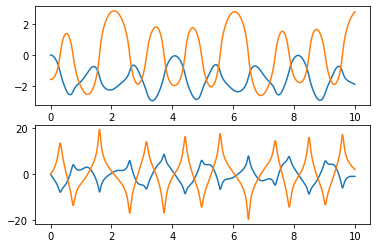

In [ ]:
plt.subplot(211)
plt.plot(times,x_traj1[:,0])
plt.plot(times,x_traj1[:,1])
plt.subplot(212)
plt.plot(times,x_traj1[:,2])
plt.plot(times,x_traj1[:,3])

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8))
ax1.get_xaxis().set_ticks([])    
ax1.get_yaxis().set_ticks([])    
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_aspect('equal', adjustable='box')

ln1, = plt.plot([],[])
ln2, = plt.plot([],[],marker = 'o',ms = 18)
ln3, = plt.plot([],[])
ln4, = plt.plot([],[],marker = 'o',ms = 18)

def animate_pendulum(i): 
    theta1 = x_traj1[i][0]
    theta2 = x_traj1[i][1]
    ln1.set_data([0,L1*np.cos(theta1)],[0, L1*np.sin(theta1)])
    ln2.set_data(L1*np.cos(theta1), L1*np.sin(theta1))
    ln3.set_data([L1*np.cos(theta1),L1*np.cos(theta1)+L2*np.cos(theta1+theta2)],[L1*np.sin(theta1), L1*np.sin(theta1)+L2*np.sin(theta1+theta2)])
    ln4.set_data(L1*np.cos(theta1)+L2*np.cos(theta1+theta2), L1*np.sin(theta1)+L2*np.sin(theta1+theta2))

n_frame = np.rint(t_length/dt).astype(int)
ani = animation.FuncAnimation(fig, animate_pendulum, frames=n_frame, interval=2)
ani.save('robot_arm1_2.gif',writer='pillow',fps=50)
plt.close()

In [ ]:
from IPython.display import Image
Image(filename="robot_arm1_2.gif")

Qc

In [23]:
from scipy.optimize import minimize
from scipy.optimize import basinhopping

theta_acc = np.zeros((10000, 2))
t_length = 10  # 10 second of simulation
dt = 0.001
times = np.arange(0, t_length, dt)
x_init = [0, np.pi / 2, 0, 0]
# print_arm_ode(x_init,times)
# x_traj2 = odeint(arm_ode, x_init, times)
# print(x_traj2)
for i in range(0, 10000):
    u = np.zeros((2,1)) # zero torque control
    M = np.mat([[
        m1 * L1**2 + m2 * (L1**2 + 2 * L1 * L2 * np.cos(x_traj[i][1]) + L2**2),
        m2 * (L1 * L2 * np.cos(x_traj[i][1]) + L2**2)
    ], [m2 * (L1 * L2 * np.cos(x_traj[i][1]) + L2**2), m2 * L2**2]])
    c = np.array(
        [[-1 * m2 * L1 * L2 * np.sin(x_traj[i][1]) * (2 * x_traj[i][2] * x_traj[i][3] + x_traj[i][3]**2)],
         [m2 * L1 * L2 * x_traj[i][2]**2 * np.sin(x_traj[i][1])]])
    gtheta = np.array([[(m1 + m2) * L1 * g * np.cos(x_traj[i][0]) +
                        m2 * g * L2 * np.cos(x_traj[i][0] + x_traj[i][1])],
                       [m2 * g * L2 * np.cos(x_traj[i][0] + x_traj[i][1])]])
    a = (np.linalg.inv(M)).dot(u - c - gtheta)
    theta_acc[i][0] = a[0]
    theta_acc[i][1] = a[1]
# print(theta_acc)
# Let x[0]=m1 x[1]=m2 x[2]=l1 x[3]=l2 
def error(x):
    error = 0
    u = np.zeros((2,1)) # zero torque control
    M = np.mat([[
        x[0] * x[2]**2 + x[1] * (x[2]**2 + 2 * x[2] * x[3] * np.cos(x_traj[i][1]) + x[3]**2),
        x[1] * (x[2] * x[3] * np.cos(x_traj[i][1]) + x[3]**2)
    ], [x[1] * (x[2] * x[3] * np.cos(x_traj[i][1]) + x[3]**2), x[1] * x[3]**2]])
    c = np.array(
        [[-1 * x[1] * x[2] * x[3] * np.sin(x_traj[i][1]) * (2 * x_traj[i][2] * x_traj[i][3] + x_traj[i][3]**2)],
         [x[1] * x[2] * x[3] * x_traj[i][2]**2 * np.sin(x_traj[i][1])]])
    gtheta = np.array([[(x[0] + x[1]) * x[2] * g * np.cos(x_traj[i][0]) +
                        x[1] * g * x[3] * np.cos(x_traj[i][0] + x_traj[i][1])],
                       [x[1] * g * x[3] * np.cos(x_traj[i][0] + x_traj[i][1])]])
    # a = M.dot(theta_acc)-(u - c - gtheta)
    for row in range(0,10000):
        a = M.dot(theta_acc[row][:].T)-(u - c - gtheta)
        # for col in range(0,2):
        error = error + a[0]+ a[1]
    return error

class MyBounds:
    def __init__(self, xmax=[10,10,10], xmin=[-10,-10,-10] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin

mybounds = MyBounds()
x0 = np.array((0,0,0,0))
# mybounds = MyBounds()
globalLocation = basinhopping(error,x0,niter=1000, minimizer_kwargs={"method":"BFGS"}, accept_test=mybounds)



ValueError: `f0` passed has more than 1 dimension.